# Module 2: Simple Neural Networks


## Part 1: Single Hidden Layer with Sigmoid Activation Function

<!-- insert png of nn1 -->
![image](nn1.png)

### #1: Illustration of the Matrices Associated with the Neural Network  

 
$X = 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}$

$W1 = 
\begin{bmatrix}
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22} & w_{32}\\
w_{13} & w_{23} & w_{33}\\
w_{14} & w_{24} & w_{34}\\
\end{bmatrix}$

$H = 
\begin{bmatrix}
h_1\\
h_2\\ 
h_3\\
h_4\\
\end{bmatrix}$

$W2 =
\begin{bmatrix}
w_{11} & w_{21} & w_{31} & w_{41}\\
\end{bmatrix}$

$B = 
\begin{bmatrix}
b_1 & b_2 & b_3 & b_4
\end{bmatrix}$

$C \in \mathbb{R}$ (c is a scalar)

$Z1 = X * W1.T + B = 
\begin{bmatrix}
z_1\\
z_2\\
z_3\\
z_4\\
\end{bmatrix}$

$\sigma (z) = \frac{1}{1+e^{-z}}$

$H = \sigma(Z1)$

$Z2 = H * W2.T + C$ (scalar)

$\hat{y} = \sigma(Z2)$ (scalar)

$y \in \mathbb{R}$ (scalar)

$\hat{y} - y \in \mathbb{R} $ (scalar)

Assuming binary cross entropy:  

$L = -y\log(\hat{y}) - (1-y)\log(1-\hat{y})$ (scalar)

With Mean Squared Error:

$L = \frac{1}{N}\sum{(\hat{y} - y)^2}$ (scalar)

### #2: Python to Code the Feed Forward portion of this Neural Network
a-c. Create a dataset and read it in
[(raw dataset is here)]('A2_Pt1_Data_ILG.csv')

In [78]:
#2a-c: Create and read in dataa
import numpy as np

np.set_printoptions(precision=6)

def get_xy(df):
   
    nrows = df.shape[0]
    ncols = df.shape[1]
   
    x = np.empty((nrows,ncols-1))
    y = np.empty((nrows,1))

    # separate labels
    if 'LABEL' in df.columns:
        y = np.array(df['LABEL'])
        x = np.array(df[df.columns.difference(['LABEL'])])
    elif 'label' in df.columns:
        y = np.array(df['label'])
        x = np.array(df[df.columns.difference(['label'])])
    else:
        raise Exception('There is no column with the title label in the data')
    return x, y

def binary_labels(y):
    y_values = set(y)
    y_value_0 = list(y_values)[0]
    y_value_1 = list(y_values)[1]
    y[y == y_value_0] = 0
    y[y == y_value_1] = 1
    y = y.reshape(-1, 1)
    return y.astype(int)

def normalize(x):
    xrows = x.shape[0]
    xcols = x.shape[1]
    xnorm = np.empty((xrows, xcols))
    for j, column in enumerate(x.T):
        max = column.max()
        min = column.min()
        for i, item in enumerate(column):
            xnorm[i,j] = (item - min)/(max - min)
    return xnorm.astype(float)

In [3]:
import pandas as pd
df = pd.read_csv('A2_Pt1_Data_ILG.csv')
x, y = get_xy(df)
y = binary_labels(y)
x = normalize(x)

print('Data is: \n', df)
print('x is: \n', x)
print('y is: \n', y)

Data is: 
    experience  skill  athleticism label
0           5      8            5  good
1           4      4            3  good
2           2      2            4   bad
3           0      2            3   bad
4           5      6            5  good
5           1      0            0   bad
x is: 
 [[1.   1.   1.  ]
 [0.6  0.8  0.5 ]
 [0.8  0.4  0.25]
 [0.6  0.   0.25]
 [1.   1.   0.75]
 [0.   0.2  0.  ]]
y is: 
 [[0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [5]:
import numpy as np
import pandas as pd

#2d: Code a sigmoid function and the derivative
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1-sigmoid(z))

#2e: Code the loss function
def mse(y, y_hat):
    return np.square(y - y_hat).mean()

def mse_derivative(y, y_hat):
    return -2*(y - y_hat)

#2: Code the feedforward function
class NeuralNetwork3D():

    def __init__(self, LR=0.1, epochs=10):
        self.LR = LR
        self.epochs = epochs
        # shape parameters
        # hidden_layers = 1
        self.hidden_layer_dim = 4
        self.output_layer_dim = 1
        self.input_layer_dim = 3

        # initialize with w1 = 1, b = 0, w2 = 2, c = -1
        self.w1 = np.ones((self.hidden_layer_dim, self.input_layer_dim))
        self.b = np.zeros((1, self.hidden_layer_dim))
        self.w2 = 2 * np.ones((self.output_layer_dim, self.hidden_layer_dim))
        self.c = -1 * np.ones((1, self.output_layer_dim))
    
    def randomize_weights(self):
        np.random.seed(44)
        self.w1 = np.random.rand(self.hidden_layer_dim, self.input_layer_dim)
        self.b = np.random.rand(1, self.hidden_layer_dim)
        self.w2 = np.random.rand(self.output_layer_dim, self.hidden_layer_dim)
        self.c = np.random.rand(1, self.output_layer_dim)

    def feed_forward(self, x):
        self.z1 = (x @ self.w1.T + self.b).astype(float)
        self.h = sigmoid(self.z1).astype(float)
        self.z2 = (self.h @ self.w2.T + self.c).astype(float)
        self.y_hat = sigmoid(self.z2).astype(float)
        return
   
    def calculate_loss(self, y):
        self.loss = mse(y, self.y_hat).astype(float)
        return
    
    def print_params(self):
        print('\nW1 is: \n', self.w1)
        print('\nB is: \n', self.b)
        print('\nZ1 is: \n', self.z1)
        print('\nH is: \n', self.h)
        print('\nW2 is: \n', self.w2)
        print('\nZ2 is: \n', self.z2)
        print('\nC is: \n', self.c)
        print('\ny^ is: \n', self.y_hat)
        print('\nL is: \n', self.loss)
        
# test code
# nn1 = NeuralNetwork3D()
# nn1.feed_forward(x)
# nn1.calculate_loss(y)
# nn1.print_params()

### #3: Check the Feed Forward Math Above by Hand
Use just the first row of the dataset, assume W1 is 1, W2 is 2, b is 0, and c is -1. Check it against the code above.

#### #3.1: Run a Feed Forward Iteration by Hand

 
$X = 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
$

$W1 = 
\begin{bmatrix}
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22} & w_{32}\\
w_{13} & w_{23} & w_{33}\\
w_{14} & w_{24} & w_{34}\\
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1\\
\end{bmatrix}$

$Z1 = X * W1.T + B = 
\begin{bmatrix}
z_1\\
z_2\\
z_3\\
z_4\\
\end{bmatrix} = 
\begin{bmatrix}
x_1*w_{11} + x_2*w_{21} + x_3*w_{31} + b_1\\
x_2*w_{12} + x_2*w_{22} + x_3*w_{32} + b_2\\
x_3*w_{13} + x_2*w_{23} + x_3*w_{33} + b_3\\
x_4*w_{14} + x_2*w_{24} + x_3*w_{34} + b_4\\
\end{bmatrix} = 
\begin{bmatrix}
1*1 + 1*1 + 1*1 + 0\\
1*1 + 1*1 + 1*1 + 0\\
1*1 + 1*1 + 1*1 + 0\\
1*1 + 1*1 + 1*1 + 0\\
\end{bmatrix} = 
\begin{bmatrix}
3\\
3\\
3\\
3\\
\end{bmatrix}$

$H = 
\begin{bmatrix}
h_1\\
h_2\\ 
h_3\\
h_4\\
\end{bmatrix} = 
\begin{bmatrix}
\sigma(z_1)\\
\sigma(z_2)\\
\sigma(z_3)\\
\sigma(z_4)\\
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{1+e^{-z_1}}\\
\frac{1}{1+e^{-z_2}}\\
\frac{1}{1+e^{-z_3}}\\
\frac{1}{1+e^{-z_4}}\\
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{1+e^{3}}\\
\frac{1}{1+e^{3}}\\
\frac{1}{1+e^{3}}\\
\frac{1}{1+e^{3}}\\
\end{bmatrix} = 
\begin{bmatrix}
0.952574\\
0.952574\\
0.952574\\
0.952574\\
\end{bmatrix} 
$

$W2 =
\begin{bmatrix}
w_{11} & w_{21} & w_{31} & w_{41}\\
\end{bmatrix} = 
\begin{bmatrix}
2 & 2 & 2 & 2\\
\end{bmatrix}$  

$B = 
\begin{bmatrix}
b_1\\
b_2\\
b_3\\
b_4\\
\end{bmatrix} = 
\begin{bmatrix}
0\\
0\\
0\\
0\\
\end{bmatrix}$

$C = -1$  

$Z2 = W2 * H + C = 
\begin{bmatrix}
2 & 2 & 2 & 2\\
\end{bmatrix} *
\begin{bmatrix}
0.952574\\
0.952574\\
0.952574\\
0.952574\\
\end{bmatrix} - 1 = 6.620593
$   

$\hat{y} = \sigma(Z2) = \sigma(6.620593) = \frac{1}{1+e^{-6.620593}} = 0.998669$

$y = 1$  

$y - \hat{y} = 0.001331$ 

Mean Squared Error:

$L = \frac{1}{N}\sum{(\hat{y} - y)^2} = \frac{1}{1}(0.001331)^2 = 0.00000177$

#### #3.2: Run a Feed Forward Iteration by Code

In [6]:
# extract just the first row of data
x0 = x[0]
y0 = y[0]

# run through the neural network nn1
nn1 = NeuralNetwork3D()
nn1.feed_forward(x0)
nn1.calculate_loss(y0)

# Print out X, y, W1, B, Z1, H1, W2, Z2, C, y^, y^-y, and L.
print('X is: \n', x0)
print('\ny is: \n', y0)
nn1.print_params()
print('\ny-y^ is: \n', y0 - nn1.y_hat)


X is: 
 [1. 1. 1.]

y is: 
 [0]

W1 is: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

B is: 
 [[0. 0. 0. 0.]]

Z1 is: 
 [[3. 3. 3. 3.]]

H is: 
 [[0.952574 0.952574 0.952574 0.952574]]

W2 is: 
 [[2. 2. 2. 2.]]

Z2 is: 
 [[6.620593]]

C is: 
 [[-1.]]

y^ is: 
 [[0.998669]]

L is: 
 0.9973400374685585

y-y^ is: 
 [[-0.998669]]


The key results, namely $\hat{y}$ and $L$ are the same as the hand calculation above. Hooray!

### #4: Write out the derivatives for each of the parameters in the Neural Network

Partial derivative of L with respect to C:
$
\frac{\partial L}{\partial C} \\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial C} \\
\quad = \frac{1}{N}*-2(y-\hat{y}) * \hat{y}(1-\hat{y}) * 1 \\
\quad = -\frac{2}{N}*(y-\hat{y})*\hat{y}(1-\hat{y}) \\
$

Partial derivative of L with respect to W2:
$
\frac{\partial L}{\partial W2} \\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial B} \\
\quad = \frac{1}{N}*-2(y-\hat{y}) * \hat{y}(1-\hat{y}) * H \\
\quad = -\frac{2}{N}*(y-\hat{y})*\hat{y}(1-\hat{y})*H \\
\quad = \frac{\partial L}{\partial C}*H
$

Partial derivative of L with respect to B:
$
\frac{\partial L}{\partial B} \\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial H} * \frac{\partial H}{\partial Z1} * \frac{\partial Z1}{\partial B} \\
\quad = \frac{1}{N}*-2(y-\hat{y}) * \hat{y}(1-\hat{y}) * W2 * H(1-H) * 1 \\
\quad = -\frac{2}{N}*(y-\hat{y})*\hat{y}(1-\hat{y})*W2*H(1-H) \\
\quad = \frac{\partial L}{\partial C}*W2*H(1-H)
$

Partial derivative of L with respect to W1:
$
\frac{\partial L}{\partial W1} \\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial H} * \frac{\partial H}{\partial Z1} * \frac{\partial Z1}{\partial W1} \\
\quad = \frac{1}{N}*-2(y-\hat{y}) * \hat{y}(1-\hat{y}) * W2 * H(1-H) * X \\
\quad = -\frac{2}{N}*(y-\hat{y})*\hat{y}(1-\hat{y})*W2*H(1-H)*X \\
\quad = \frac{\partial L}{\partial C}*W2*H(1-H)*X \\
\quad = \frac{\partial L}{\partial B}*X
$

### #5: Code Backpropogation

In [7]:
# assume x and y have been read
# assume mse and sigmoid have been defined
# assume np has been imported 
# assume NeuralNetwork3D class has been defined

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def update_weights(self, y):
    self.dLdC = (2*(mse_derivative(y, self.y_hat) * sigmoid_derivative(self.z2))).astype(float) # shape is (6x1) 
    self.dLdW2 = (self.dLdC * self.h).astype(float) # (6x1)*(6x4) = (6x4)
    self.dLdB = (self.dLdC @ self.w2).astype(float) * sigmoid_derivative(self.z1) # (6x1) @ (1x4) * (6x4) = (6x4)
    self.dLdW1 = (self.dLdB.T @ x).astype(float) # (4x6) @ (6x3) = (4x3)
    self.c = (self.c - self.LR * self.dLdC.mean()).astype(float) # (1x1) - LR*(6x1).mean = (1x1)
    self.w2 = (self.w2 - self.LR * self.dLdW2.mean(axis=0)).astype(float) # (1x4) - LR*(6x4).mean = (1x4) 
    self.b = (self.b - self.LR * self.dLdB.mean(axis=0)).astype(float) # (1x4) - LR*(6x4).mean = (1x4)
    self.w1 = (self.w1 - self.LR * self.dLdW1).astype(float) # (4x3) - LR*(4x3) = (4x3)
    return

def print_derivatives(self):
    # print derivatives rounded to 5 decimal places
    print('\ndLdC is: \n', self.dLdC) 
    print('\ndLdW2 is: \n', self.dLdW2)
    print('\ndLdB is: \n', self.dLdB)
    print('\ndLdW1 is \n', self.dLdW1)

def train(self, x, y, verbose=False, plot=True):
    if verbose:
        print('Preparing to train Neural Network...')
        print('X is: \n', x)
        print('\ny is: \n', y)
    self.randomize_weights()
    self.loss_by_epoch = []
    for e in range(self.epochs):
        if verbose:
            print('###############################################################\nNow running epoch', e+1, 'of', self.epochs, 'total epochs.')
            print('Feeding forward...')
        self.feed_forward(x)
        if verbose:
            print('Calculating loss...')
        self.calculate_loss(y)
        if verbose:
            print('The parameters are: ')
            self.print_params()
            print('\nPerforming backpropogation...')
        self.update_weights(y)
        if verbose:
            print('The derivatives are: ')
            self.print_derivatives()
            print('\nFinished epoch', e+1, 'with loss', self.loss)
        self.loss_by_epoch.append(self.loss)
    if plot:
        plot_loss(self)
        plot_confusion_matrix(self, y)
    
def plot_loss(self):
    y = self.loss_by_epoch
    x = range(self.epochs)
    plt.plot(x, y)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss by Epoch')
    plt.show()

def plot_confusion_matrix(self, y):
    self.y_pred = np.where(self.y_hat > 0.5, 1, 0)
    self.cm = confusion_matrix(y, self.y_pred)
    classes = ['0: Bad', '1: Good']
    display = ConfusionMatrixDisplay(self.cm, display_labels=classes)
    display.plot()
    display.ax_.set_title('Confusion Matrix for Player Ability Prediction')

NeuralNetwork3D.update_weights = update_weights
NeuralNetwork3D.print_derivatives = print_derivatives
NeuralNetwork3D.train = train


In [8]:
# Test out NN with just 2 epochs, verbosely
nn2 = NeuralNetwork3D(LR=10, epochs=2)
nn2.train(x, y, verbose=True, plot=False)

Preparing to train Neural Network...
X is: 
 [[1.   1.   1.  ]
 [0.6  0.8  0.5 ]
 [0.8  0.4  0.25]
 [0.6  0.   0.25]
 [1.   1.   0.75]
 [0.   0.2  0.  ]]

y is: 
 [[0]
 [0]
 [1]
 [1]
 [0]
 [1]]
###############################################################
Now running epoch 1 of 2 total epochs.
Feeding forward...
Calculating loss...
The parameters are: 

W1 is: 
 [[0.834842 0.104796 0.74464 ]
 [0.360501 0.359311 0.609238]
 [0.39378  0.409073 0.509902]
 [0.710148 0.960526 0.456621]]

B is: 
 [[0.427652 0.113464 0.217899 0.957472]]

Z1 is: 
 [[2.11193  1.442514 1.530653 3.084767]
 [1.384714 0.921832 1.036376 2.380292]
 [1.323604 0.697898 0.824027 2.023956]
 [1.114717 0.482074 0.581642 1.497716]
 [1.92577  1.290204 1.403178 2.970612]
 [0.448611 0.185326 0.299713 1.149577]]

H is: 
 [[0.892057 0.808844 0.822102 0.95626 ]
 [0.799747 0.715415 0.73815  0.915312]
 [0.789781 0.667722 0.695091 0.883289]
 [0.753007 0.618237 0.641445 0.817234]
 [0.87278  0.784182 0.802688 0.951229]
 [0.610309 0.5

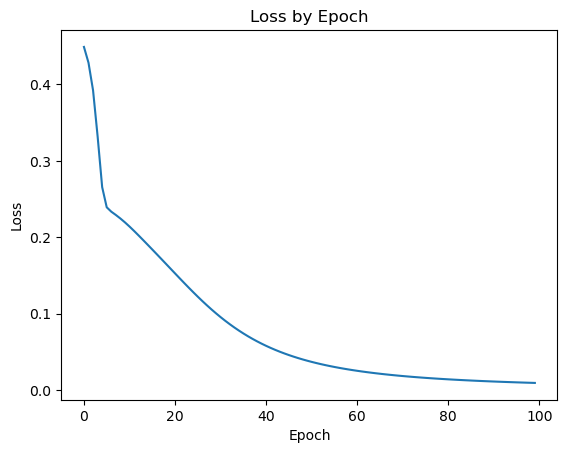

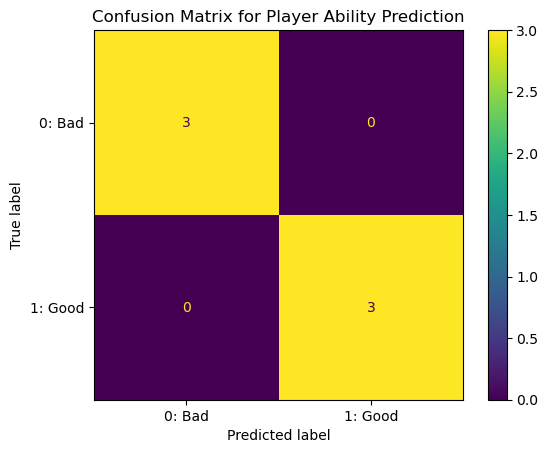

In [9]:
# Test out NN with just 100 epochs quietly, plot results
nn3 = NeuralNetwork3D(LR=1, epochs=100)
nn3.train(x, y, verbose=False, plot=True)

### #6 Test the Neural Network with a Test Dataset

Now let's test our model with a new dataset. To do that, we'll need the following steps:
1. Create a new test dataset (titled A2_Test_ILG.csv) [(raw dataset is here)]('./A2_Pt1_Test_ILG.csv')
2. Import the data
3. Remove the labels, convert them to 0 or 1, set to y_test
4. Normalize the input values, set to x_test
5. Create a new method for our NeuralNetwork3D class called predict that takes in x_test and y_test and runs a single feedforward iteration, compares y_test to the predicted value, and returns a confusion matrix of the results.

In [79]:
# read in test data and clean and display
df_test = pd.read_csv('A2_Pt1_Test_ILG.csv')
x_test, y_test = get_xy(df_test)
x_test = normalize(x_test)
y_test = binary_labels(y_test)

print('The data is: \n', df_test)
print('\nX is: \n', x_test)
print('\nY is: \n', y_test)

The data is: 
     experience  skill  athleticism label
0            5      8            5  good
1            4      4            3  good
2            5      6            4  good
3            5      4            4  good
4            2      5            5  good
5            4      8            5  good
6            3      7            3  good
7            5      8            2  good
8            2      2            4   bad
9            0      2            3   bad
10           1      2            1   bad
11           0      2            3   bad
12           2      1            0   bad
13           1      0            1   bad
14           1      1            0   bad
15           0      0            0   bad

X is: 
 [[1.    1.    1.   ]
 [0.6   0.8   0.5  ]
 [0.8   1.    0.75 ]
 [0.8   1.    0.5  ]
 [1.    0.4   0.625]
 [1.    0.8   1.   ]
 [0.6   0.6   0.875]
 [0.4   1.    1.   ]
 [0.8   0.4   0.25 ]
 [0.6   0.    0.25 ]
 [0.2   0.2   0.25 ]
 [0.6   0.    0.25 ]
 [0.    0.4   0.125]
 [0.2 

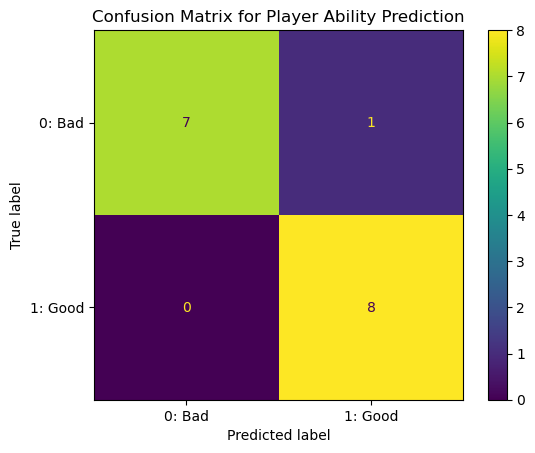

In [80]:
def predict(self, x, y):
    self.feed_forward(x)
    plot_confusion_matrix(self, y)

NeuralNetwork3D.predict = predict

nn3.predict(x_test, y_test)

This concludes Part 1. We built a fully connected feedforward Neural Network for 3D input data. The NN has one hidden layer with 4 nodes and makes a single binary prediction. We trained the model using backpropogation and tested it with a new dataset.

## Part 2: Multi-Nomial Neural Network with Softmax, Catagorical Cross-Entropy, and One-Hot Encoding

### #1: Diagram of New Neural Network
![image2](nn2.png)

### #2: Feedforward Equations for New Neural Network  
 
$X = 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}$

$W1 = 
\begin{bmatrix}
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22} & w_{32}\\
\end{bmatrix}$

$B = 
\begin{bmatrix}
b_1 & b_2 & b_3 & b_4
\end{bmatrix}$


$Z1 = X * W1.T + B = 
\begin{bmatrix}
z_1\\
z_2
\end{bmatrix}$

$H = ReLU(Z1) =
\begin{bmatrix}
h_1\\
h_2\\
\end{bmatrix} = 
\begin{bmatrix}
ReLU(z_1)\\
ReLU(z_2)\\
\end{bmatrix}$

$W2 =
\begin{bmatrix}
w_{11} & w_{21}\\
w_{12} & w_{22}\\
w_{13} & w_{23}\\
w_{14} & w_{24}\\
\end{bmatrix}$

$Z2 = H * W2.T + C = 
\begin{bmatrix}
Z2_1\\
Z2_2\\
Z2_3\\
Z2_4\\
\end{bmatrix}$

$\hat{y} = softmax(Z2) = 
\begin{bmatrix}
\hat{y}_1\\
\hat{y}_2\\
\hat{y}_3\\
\hat{y}_4
\end{bmatrix} = 
\frac{1}{\sum{e^{\hat{y}}}}
\begin{bmatrix}
e^{\hat{y}_1}\\ 
e^{\hat{y}_2}\\ 
e^{\hat{y}_3}\\ 
e^{\hat{y}_4}
\end{bmatrix}$ 

$o = argmax(\hat{y})$ (scalar)

$ReLU(z) = max(z, 0)$

$softmax(z) = \frac{e^z}{\sum{e^z}}$

Categorical Cross Entropy:  
$L = -\sum{y_i * log(\hat{y}_i)}$

### #3 Derivatives of the Loss Function for Each Parameter (W1, B, W2, C)

**Before we calculate the derivatives that require the chain rule, let's define each of the partial derivatives that we'll need to use:**

Partial derivative of L with respect to $\hat{y}$:
$\frac{\partial L}{\partial \hat{y}} = \frac{y}{\hat{y}}$

Partial derivative of $\hat{y}$ with respect to Z2:
$\frac{\partial \hat{y}}{\partial Z2} = 
\begin{bmatrix}
\hat{y_1}*(1-\hat{y_1}) & -\hat{y_1}*\hat{y_2} & -\hat{y_1}*\hat{y_3} & -\hat{y_1}*\hat{y_4}\\
-\hat{y_2}*\hat{y_1} & \hat{y_2}*(1-\hat{y_2}) & -\hat{y_2}*\hat{y_3} & -\hat{y_2}*\hat{y_4}\\
-\hat{y_3}*\hat{y_1} & -\hat{y_3}*\hat{y_2} & \hat{y_3}*(1-\hat{y_3}) & -\hat{y_3}*\hat{y_4}\\
-\hat{y_4}*\hat{y_1} & -\hat{y_4}*\hat{y_2} & -\hat{y_4}*\hat{y_3} & \hat{y_4}*(1-\hat{y_4})\\ 
\end{bmatrix}$

Partial derivative of Z2 with respect to C:
$\frac{\partial Z2}{\partial C} = 1$

Partial derivative of Z2 with respect to W2:
$\frac{\partial Z2}{\partial W2} = H$

Partial derivative of Z2 with respect to H:
$\frac{\partial Z2}{\partial W2} = W2$

Partial derivative of H with respect to Z1:
$\frac{\partial H}{\partial Z1} = 
\begin{cases}
      0 \quad if z <= 0\\
      1 \quad if z > 0\\
\end{cases}$

Partial derivative of Z1 with respect to B:
$\frac{\partial Z1}{\partial B} = 1$

Partial derivative of Z1 with respect to W1:
$\frac{\partial Z1}{\partial W1} = X$

Partial derivative of Z1 with respect to X:
$\frac{\partial Z1}{\partial W1} = W1$

**Okay, now we're ready to find the partial derivatives of the loss function with respect to each parameter:**

Partial derivative of L with respect to C:
$\frac{\partial L}{\partial C}\\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial C}\\
\quad = \frac{y}{\hat{y}} * 
\begin{bmatrix}
\hat{y_1}*(1-\hat{y_1}) & -\hat{y_1}*\hat{y_2} & -\hat{y_1}*\hat{y_3} & -\hat{y_1}*\hat{y_4}\\
-\hat{y_2}*\hat{y_1} & \hat{y_2}*(1-\hat{y_2}) & -\hat{y_2}*\hat{y_3} & -\hat{y_2}*\hat{y_4}\\
-\hat{y_3}*\hat{y_1} & -\hat{y_3}*\hat{y_2} & \hat{y_3}*(1-\hat{y_3}) & -\hat{y_3}*\hat{y_4}\\
-\hat{y_4}*\hat{y_1} & -\hat{y_4}*\hat{y_2} & -\hat{y_4}*\hat{y_3} & \hat{y_4}*(1-\hat{y_4})\\ 
\end{bmatrix} * 1
$

Partial derivative of L with respect to W2:
$\frac{\partial L}{\partial W2}\\\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial W2}\\
\quad = \frac{y}{\hat{y}} *
\begin{bmatrix}
\hat{y_1}*(1-\hat{y_1}) & -\hat{y_1}*\hat{y_2} & -\hat{y_1}*\hat{y_3} & -\hat{y_1}*\hat{y_4}\\
-\hat{y_2}*\hat{y_1} & \hat{y_2}*(1-\hat{y_2}) & -\hat{y_2}*\hat{y_3} & -\hat{y_2}*\hat{y_4}\\
-\hat{y_3}*\hat{y_1} & -\hat{y_3}*\hat{y_2} & \hat{y_3}*(1-\hat{y_3}) & -\hat{y_3}*\hat{y_4}\\
-\hat{y_4}*\hat{y_1} & -\hat{y_4}*\hat{y_2} & -\hat{y_4}*\hat{y_3} & \hat{y_4}*(1-\hat{y_4})\\
\end{bmatrix} * H \\
\quad = \frac{\partial L}{\partial C} * H
$

Partial derivative of L with respect to B:
$\frac{\partial L}{\partial B}\\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial H} * \frac{\partial H}{\partial Z1} * \frac{\partial Z1}{\partial B}\\
\quad = \frac{y}{\hat{y}} *
\begin{bmatrix}
\hat{y_1}*(1-\hat{y_1}) & -\hat{y_1}*\hat{y_2} & -\hat{y_1}*\hat{y_3} & -\hat{y_1}*\hat{y_4}\\
-\hat{y_2}*\hat{y_1} & \hat{y_2}*(1-\hat{y_2}) & -\hat{y_2}*\hat{y_3} & -\hat{y_2}*\hat{y_4}\\
-\hat{y_3}*\hat{y_1} & -\hat{y_3}*\hat{y_2} & \hat{y_3}*(1-\hat{y_3}) & -\hat{y_3}*\hat{y_4}\\
-\hat{y_4}*\hat{y_1} & -\hat{y_4}*\hat{y_2} & -\hat{y_4}*\hat{y_3} & \hat{y_4}*(1-\hat{y_4})\\
\end{bmatrix} * W2 *
\begin{cases}
      0 \quad if z <= 0\\
      1 \quad if z > 0\\
\end{cases} * 1\\
\quad = \frac{\partial L}{\partial C} * W2 * 
\begin{cases}
      0 \quad if z <= 0\\
      1 \quad if z > 0\\
\end{cases}
$

Partial derivative of L with respect to W1:
$\frac{\partial L}{\partial W1}\\
\quad = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2} * \frac{\partial Z2}{\partial H} * \frac{\partial H}{\partial Z1} * \frac{\partial Z1}{\partial W1}\\
\quad = \frac{y}{\hat{y}} *
\begin{bmatrix}
\hat{y_1}*(1-\hat{y_1}) & -\hat{y_1}*\hat{y_2} & -\hat{y_1}*\hat{y_3} & -\hat{y_1}*\hat{y_4}\\
-\hat{y_2}*\hat{y_1} & \hat{y_2}*(1-\hat{y_2}) & -\hat{y_2}*\hat{y_3} & -\hat{y_2}*\hat{y_4}\\
-\hat{y_3}*\hat{y_1} & -\hat{y_3}*\hat{y_2} & \hat{y_3}*(1-\hat{y_3}) & -\hat{y_3}*\hat{y_4}\\
-\hat{y_4}*\hat{y_1} & -\hat{y_4}*\hat{y_2} & -\hat{y_4}*\hat{y_3} & \hat{y_4}*(1-\hat{y_4})\\
\end{bmatrix} * W2 *
\begin{cases}
      0 \quad if z <= 0\\
      1 \quad if z > 0\\
\end{cases} * X\\
\quad = \frac{\partial L}{\partial C} * W2 * 
\begin{cases}
      0 \quad if z <= 0\\
      1 \quad if z > 0\\
\end{cases} * X \\
\quad = \frac{\partial L}{\partial B} * X
$


### #4: Test Calculation of Softmax
Assume $Z2 = \begin{bmatrix} 1.1 \\ 2.2 \\ 0.2 \\ -1.7 \end{bmatrix}$, let's calculate $\hat{y}$.

$\hat{y} = softmax(Z2)\\
\quad = \frac{1}{\sum{e^{Z2_i}}} 
    \begin{bmatrix}
    e^{1.1} \\
    e^{2.2} \\
    e^{0.2} \\
    e^{-1.7} \\
    \end{bmatrix}\\
\quad = \frac{1}{e^{1.1} + e^{2.2} + e^{0.2} + e^{-1.7}} 
    \begin{bmatrix}
    e^{1.1} \\
    e^{2.2} \\
    e^{0.2} \\
    e^{-1.7} \\
    \end{bmatrix}\\
\quad = \frac{1}{13.43} 
    \begin{bmatrix}
    3.004 \\
    9.025 \\
    1.221 \\
    0.1827
    \end{bmatrix}\\
\quad = 
    \begin{bmatrix}
    0.224 \\
    0.672 \\
    0.091 \\
    0.014
    \end{bmatrix}\\
$


### #5 Write out the Derivative for Softmax when $i = j$ and when $i \neq j$

A reminder that softmax is defined as follows:
$\hat{y_i} = \frac{e^{Z_i}}{\sum{e^{Z_j}}}$

Another reminder on the quotient rule. If $f(x) = \frac{u(x)}{v(x)}$, then
$f'(x) = \frac{u'(x)v(x) - u(x)v'(x)}{v(x)^2}$

Here we have $u(x) = e^{Z_i}$ and $v(x) = \sum{e^{Z_j}}$

**First, let's calculate the derivative when $i \neq j$.**  
Now, $u'(z_j) = 0$ and $v'(x) = e^{Z_j}$  

$\frac{\partial \hat{y}}{\partial Z_j } = \frac{u'(x)v(x) - u(x)v'(x)}{v(x)^2}\\
\quad = \frac{0 * \sum{e^{Z_j}} - e^{Z_i} * e^{Z_j}}{(\sum{e^{Z_j}})^2}\\
\quad = -\frac{e^{Z_i}}{\sum{e^{Z_j}}}*\frac{e^{Z_j}}{\sum{e^{Z_j}}}\\
\quad = -\hat{y_i}\hat{y_j}
$


**Now, let's calculate the derivative when $i = j$.**  
Since $i = j$, $z_i = z_j$,
now $u'(z_i) = e^{Z_i}$ and $v'(x) = e^{Z_j} = e^{Z_i}$   

$\frac{\partial \hat{y}}{\partial Z_j } = \frac{u'(x)v(x) - u(x)v'(x)}{v(x)^2}\\
\quad = \frac{e^{Z_i} * \sum{e^{Z_j}} - e^{Z_i} * e^{Z_i}}{(\sum{e^{Z_j}})^2}\\
\quad = \frac{e^{Z_i}}{\sum{e^{Z_j}}}*\frac{\sum{e^{Z_j}}-e^{Z_i}}{\sum{e^{Z_j}}}\\
\quad = \frac{e^{Z_i}}{\sum{e^{Z_j}}}(1-\frac{e^{Z_i}}{\sum{e^{Z_j}}})\\
\quad = \hat{y_i}(1 - \hat{y_j})\\
$

Written in matrix form as the Jacobian, we have:  
$\frac{\partial \hat{y}}{\partial Z } =
\begin{bmatrix}
\hat{y_1}(1-\hat{y_1}) & -\hat{y_1}\hat{y_2} & -\hat{y_1}\hat{y_3} & -\hat{y_1}\hat{y_4}\\
-\hat{y_2}\hat{y_1} & \hat{y_2}(1-\hat{y_2}) & -\hat{y_2}\hat{y_3} & -\hat{y_2}\hat{y_4}\\
-\hat{y_3}\hat{y_1} & -\hat{y_3}\hat{y_2} & \hat{y_3}(1-\hat{y_3}) & -\hat{y_3}\hat{y_4}\\
-\hat{y_4}\hat{y_1} & -\hat{y_4}\hat{y_2} & -\hat{y_4}\hat{y_3} & \hat{y_4}(1-\hat{y_4})\\
\end{bmatrix}
$


### #6: Partial Derivative of Loss with Respect to $Z2$

$\frac{\partial L}{\partial Z2} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial Z2}\\
\quad =
    -\sum_{i} \frac{y_i}{\hat{y_i}} *
    \begin{cases}
    \hat{y_i}(1 - \hat{y_j}) \quad if i = j\\
    \hat{y_i}\hat{y_j} \quad\quad if i \neq j\\
    \end{cases} \\
\quad = \hat{y}_i - y_i    
$

### #7: Neural Network with Softmax, Categorical Cross Entropy, and ReLU Activation Coded

In [60]:
# create a function to one-hot-encode categorical data
def one_hot_encode(y):
    y_values = set(y)
    y_length = len(y_values)
    # convert values in y to integers
    for i, item in enumerate(y_values):
        y[y == item] = i

    # create new y array with one hot encoding
    y_new = np.zeros((len(y), y_length))
    for i, item in enumerate(y): 
        y_new[i, item] = 1    
    return y_new.astype(int)

df2 = pd.read_csv('A2_Pt2_Data_ILG.csv')
x2, y2 = get_xy(df2)
x2 = normalize(x2)
y2 = one_hot_encode(y2)

print('The data is: \n', df2)
print('\nX normalized is: \n', x2)
print('\nY one hot encoded is: \n', y2)


The data is: 
     experience  skill  athleticism  label
0            5      8            5      3
1            4      4            3      3
2            5      6            4      3
3            5      4            5      3
4            2      5            5      2
5            4      8            5      2
6            3      7            3      2
7            5      8            2      2
8            2      3            4      1
9            0      2            3      1
10           1      2            1      1
11           0      2            3      1
12           2      1            0      0
13           1      0            1      0
14           1      1            0      0
15           0      0            0      0
16           0      0            1      0

X normalized is: 
 [[1.    1.    1.   ]
 [0.6   0.8   0.5  ]
 [0.8   1.    0.75 ]
 [1.    1.    0.5  ]
 [1.    0.4   0.625]
 [1.    0.8   1.   ]
 [0.6   0.6   0.875]
 [0.4   1.    1.   ]
 [0.8   0.4   0.375]
 [0.6   0.    0.25 ]

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# activation function
def relu(z):
    return np.maximum(0, z)
def relu_derivative(z):
    return np.where(z > 0, 1, 0)

# loss function
def cce(y, y_hat):
    return -np.sum(y*np.log(y_hat))

# output layer activation function
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(-1, 1)


#2: Code the feedforward function
class NeuralNetworkCCE():
    # assumes one hidden layer
    # assumes one-hot-encoded y
    # assumes softmax activation on output layer
    # assumes cross-entropy loss

    def __init__(self, LR=0.1, epochs=10, activation='relu', input_layer_dim=3, hidden_layer_dim=2, output_layer_dim=4):
        self.LR = LR
        self.epochs = epochs
        # shape parameters
        self.hidden_layer_dim = hidden_layer_dim
        self.output_layer_dim = output_layer_dim
        self.input_layer_dim = input_layer_dim

        if activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'sigmoid': 
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative

        # initialize with weights as ones and biases as zeros
        self.w1 = np.ones((self.hidden_layer_dim, self.input_layer_dim))
        self.b = np.zeros((1, self.hidden_layer_dim))
        self.w2 = np.ones((self.output_layer_dim, self.hidden_layer_dim))
        self.c = np.zeros((1, self.output_layer_dim))
    
    def randomize_weights(self):
        np.random.seed(44)
        self.w1 = np.random.rand(self.hidden_layer_dim, self.input_layer_dim)
        self.b = np.random.rand(1, self.hidden_layer_dim)
        self.w2 = np.random.rand(self.output_layer_dim, self.hidden_layer_dim)
        self.c = np.random.rand(1, self.output_layer_dim)

    def feed_forward(self, x):
        self.z1 = (x @ self.w1.T + self.b).astype(float)
        self.h = self.activation(self.z1).astype(float)
        self.z2 = (self.h @ self.w2.T + self.c).astype(float)
        self.y_hat = softmax(self.z2).astype(float)
        self.output = np.argmax(self.y_hat, axis=1).reshape(-1, 1)
        return
   
    def calculate_loss(self, y):
        self.loss = cce(y, self.y_hat).astype(float)
        return
    
    def print_params(self):
        print('\nW1 is: \n', self.w1) # shape is (2x3)
        print('\nB is: \n', self.b) # shape is (1x2)
        print('\nZ1 is: \n', self.z1) # shape is (17x2)
        print('\nH is: \n', self.h) # shape is (17x2)
        print('\nW2 is: \n', self.w2) # shape is (4x2)
        print('\nZ2 is: \n', self.z2) # shape is (17x4)
        print('\nC is: \n', self.c) # shape is (1x4)
        print('\ny^ is: \n', self.y_hat) # shape is (17x4)
        print('\noutput is: \n', self.output) # shape is (17x1)
        print('\nL is: \n', self.loss) # shape is (1x1)
        

    def backpropogate(self, x, y):
        self.dLdC = (self.y_hat - y).astype(float) # shape is (17x4) 
        self.dLdW2 = (self.dLdC.T @ self.h).astype(float) # (4x17)*(17x2) = (4x2)
        self.dLdB = (self.dLdC @ self.w2 * self.activation_derivative(self.z1)).astype(float) # (17x4) @ (4x2) * (17x2) = (17x2)
        self.dLdW1 = (self.dLdB.T @ x).astype(float) # (2x17)*(17x3) = (2x3)
    
    def print_derivatives(self):
        print('\ndLdC is: \n', self.dLdC) # shape is (17x4)
        print('\ndLdW2 is: \n', self.dLdW2) # shape is (4x2)
        print('\ndLdB is: \n', self.dLdB) # shape is (17x2)
        print('\ndLdW1 is \n', self.dLdW1) # shape is (2x3)

    def update_params(self):
        self.c = (self.c - self.LR * self.dLdC.mean(axis=0)).astype(float) # (1x4)-LR*(17x4).mean = (1x4)
        self.w2 = (self.w2 - self.LR * self.dLdW2).astype(float) # (4x2)-LR*(4x2).mean = (4x2) 
        self.b = (self.b - self.LR * self.dLdB.mean(axis=0)).astype(float) # (1x2)-LR*(17x2).mean = (1x2)
        self.w1 = (self.w1 - self.LR * self.dLdW1).astype(float) # (2x3)-LR*(2x3) = (2x3)
        return

    def train(self, x, y, verbose=False, plot=True):
        if verbose:
            print('Preparing to train Neural Network...')
            print('X is: \n', x)
            print('\ny is: \n', y)
        self.randomize_weights()
        self.loss_by_epoch = []
        for e in range(self.epochs):
            if verbose:
                print('###############################################################\nNow running epoch', e+1, 'of', self.epochs, 'total epochs.')
                print('Feeding forward...')
            self.feed_forward(x)
            if verbose:
                print('Calculating loss...')
            self.calculate_loss(y)
            if verbose:
                print('The parameters are: ')
                self.print_params()
                print('\nPerforming backpropogation...')
            self.backpropogate(x, y)
            self.update_params()
            if verbose:
                print('The derivatives are: ')
                self.print_derivatives()
                print('\nFinished epoch', e+1, 'with loss', self.loss)
            self.loss_by_epoch.append(self.loss)
        if verbose:
            print('Training complete! Loss by epoch is: \n', self.loss_by_epoch)
        if plot:
            y = self.loss_by_epoch
            x = range(self.epochs)
            plt.plot(x, y)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Loss by Epoch')
            plt.show()

    # multilabel confusion matrix
    def plot_confusion_matrix(self, y):
        y_pred = self.output
        y = np.argmax(self.y_hat, axis=1).reshape(-1, 1)
        self.cm = confusion_matrix(y, y_pred)
        classes = ['0: Bad', '1: Okay', '2: Good', '3: Great']
        display = ConfusionMatrixDisplay(self.cm, display_labels=classes)
        display.ax_.set_title('Confusion Matrix for Player Ability Prediction')
        display.plot()
        # calculate accuracy
        self.accuracy = accuracy_score(y, y_pred)
        print('Accuracy is: ', self.accuracy)
    
    def predict(self, x, y):
        self.feed_forward(x)
        self.plot_confusion_matrix(y)

In [75]:
# test code with verbose mode
nn4 = NeuralNetworkCCE(
    LR=0.001,
    epochs=2, 
    activation='relu', 
    input_layer_dim=3, 
    hidden_layer_dim=2, 
    output_layer_dim=4
)
nn4.train(x2, y2, verbose=True, plot=False)


Preparing to train Neural Network...
X is: 
 [[1.    1.    1.   ]
 [0.6   0.8   0.5  ]
 [0.8   1.    0.75 ]
 [1.    1.    0.5  ]
 [1.    0.4   0.625]
 [1.    0.8   1.   ]
 [0.6   0.6   0.875]
 [0.4   1.    1.   ]
 [0.8   0.4   0.375]
 [0.6   0.    0.25 ]
 [0.2   0.2   0.25 ]
 [0.6   0.    0.25 ]
 [0.    0.4   0.125]
 [0.2   0.2   0.   ]
 [0.    0.2   0.125]
 [0.    0.    0.   ]
 [0.2   0.    0.   ]]

y is: 
 [[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]
###############################################################
Now running epoch 1 of 2 total epochs.
Feeding forward...
Calculating loss...
The parameters are: 

W1 is: 
 [[0.834842 0.104796 0.74464 ]
 [0.360501 0.359311 0.609238]]

B is: 
 [[0.39378  0.409073]]

Z1 is: 
 [[2.078058 1.738123]
 [1.350842 1.217441]
 [1.72493  1.513713]
 [1.705738 1.433503]
 [1.73594  1.294072]
 [2.057099 1.66626 ]

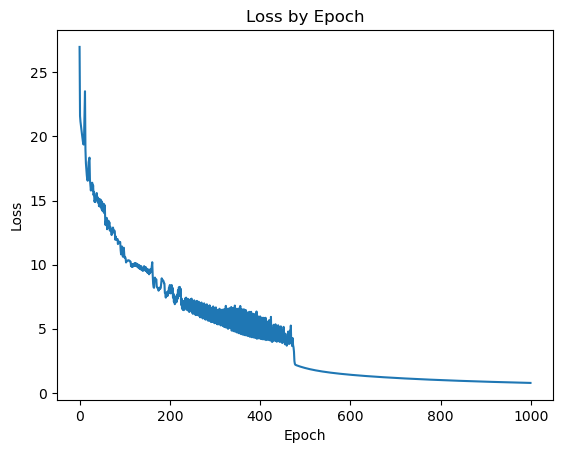

Accuracy is:  1.0


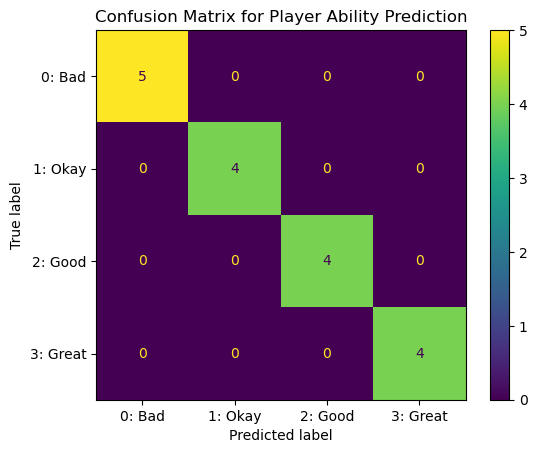

In [88]:
# test the code with 1000 epochs and verbose mode off, plot on
nn5 = NeuralNetworkCCE(
    LR=0.1,
    epochs=1000,
    activation='relu',
    input_layer_dim=3,
    hidden_layer_dim=2,
    output_layer_dim=4
)
nn5.train(x2, y2, verbose=False, plot=True)
nn5.plot_confusion_matrix(y2)

In [89]:
# export to HTML for webpage
import os

# os.system('jupyter nbconvert --to html mod1.ipynb')
os.system('jupyter nbconvert --to html mod2.ipynb --HTMLExporter.theme=dark')

0